### ***Environmental preparation***

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### ***Dataset preparation***

In [2]:
# Importing a dataset and creating a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df = data.copy()

### ***EDA***

In [3]:
# Display the size of the DataFrame
df.shape

(20640, 10)

In [4]:
# Display DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Display List of numerical columns
list(df.dtypes[df.dtypes == 'float64'].index)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [6]:
# Display DataFrame Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


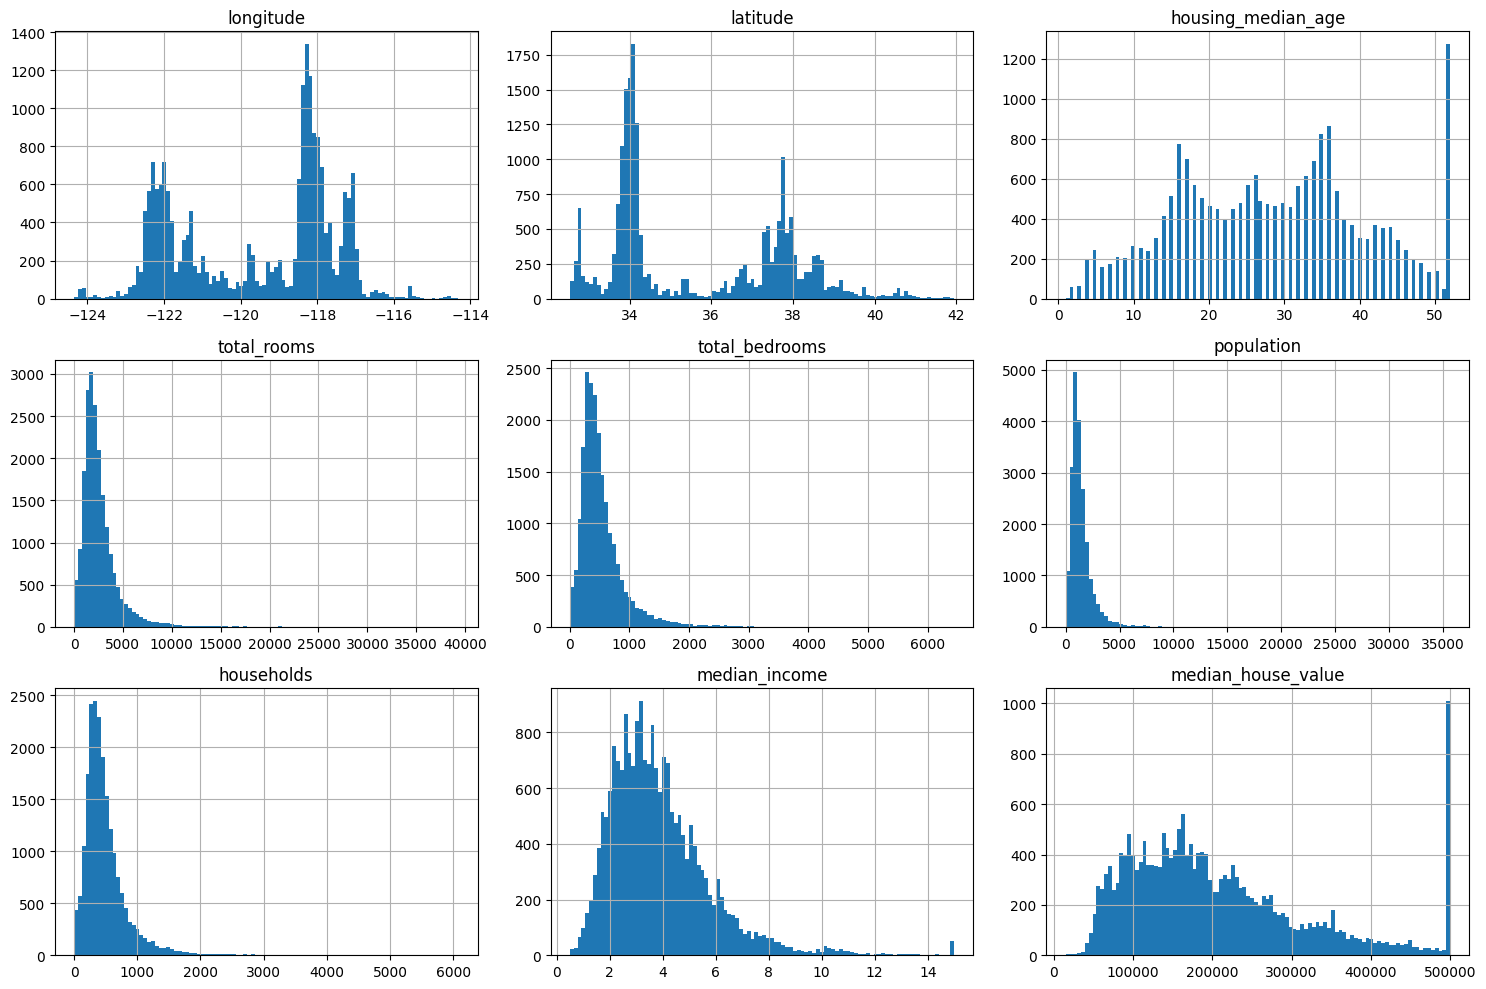

In [7]:
# Create histograms for multiple columns
columns_to_plot = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    df[column].hist(bins=100, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

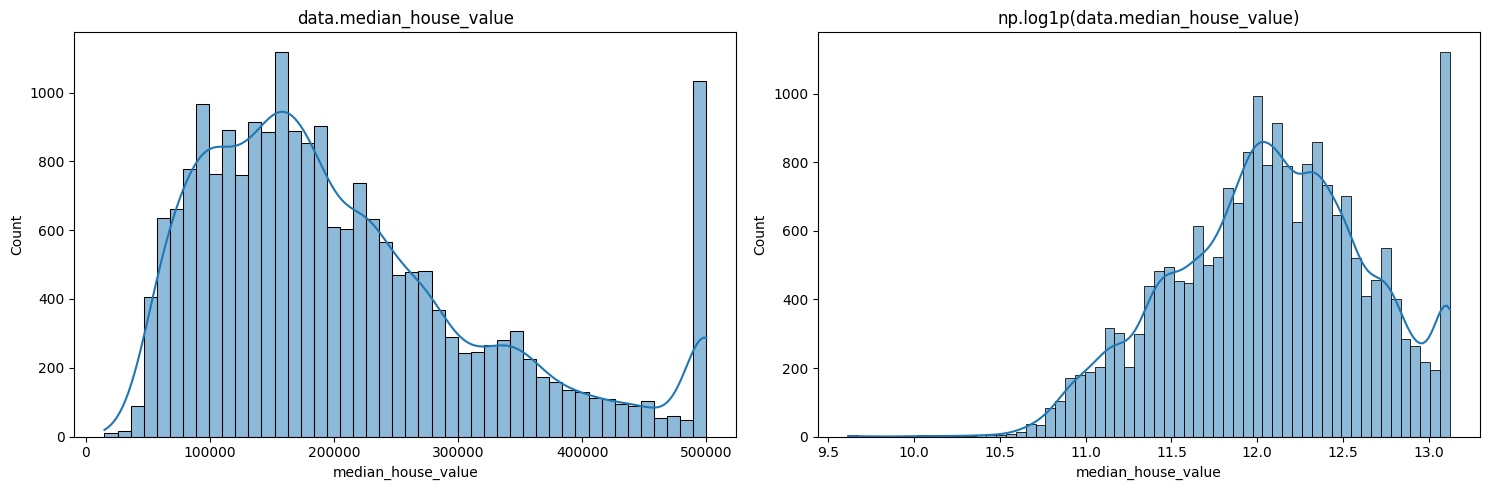

In [8]:
# Create a figure with two subplots arranged in a single row, each subplot having its own axes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Create a histogram using Seaborn for the 'median_house_value' data
sns.histplot(data.median_house_value, ax=axes[0],  kde=True)
axes[0].set_title('data.median_house_value')

# Create a histogram using Seaborn for the logarithm of 'median_house_value' after applying np.log1p
sns.histplot(np.log1p(data.median_house_value), ax=axes[1], kde=True)
axes[1].set_title('np.log1p(data.median_house_value)')

plt.tight_layout()
plt.show()

### ***Preparing the dataset***

In [9]:
# Retention of records whose ocean_proximity has the value "<1H OCEAN" or "INLAND".
df_subset = df.loc[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
display(df_subset.shape)
display(df_subset)

(15687, 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# Define the list of columns to keep
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

# Create a new DataFrame with only the selected columns
df_selected = df_subset[selected_columns]

In [11]:
# Display the size of the DataFrame
df_selected.shape

(15687, 9)

## **Question 1**


In [12]:
# Check for missing values in each column
missing_values_count = df_selected.isnull().sum()

print("Count of missing values in each column:")
print(missing_values_count)

# Find the columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()

# Print information about columns with missing values
for column in columns_with_missing_values:
    print(f'\nAnswer Q1: In the dataset, empty values have a column {column}')

Count of missing values in each column:
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer Q1: In the dataset, empty values have a column total_bedrooms


## **Question 2**



In [13]:
# Calculate the median for the 'population' variable
median_population = df_selected['population'].median()

print(f'\nAnswer Q2: Median population is {median_population:.0f}')


Answer Q2: Median population is 1195


In [14]:
# Shuffle the data:

np.random.seed(2)

n = len(df_selected)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_selected.iloc[idx]

# Data split
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

print(f"length of training set = {len(df_train)}")
print(f"length of validation set = {len(df_val)}")
print(f"length of test set = {len(df_test)}")

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

length of training set = 9413
length of validation set = 3137
length of test set = 3137


In [15]:
# Applying a logarithmic transformation to the median_house_value variable using the function np.log1p()
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## **Question** 3



In [16]:
def prepare_X_null(df):
    #  function to prepare dataset with 0
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X


def prepare_X_mean(df):
    # function to prepare dataset with mean
    df = df.copy()
    mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(mean)
    X = df.values
    return X



***Linear Regression***

In [17]:
def train_linear_regression(X, y):
    # function to train the Linear Regression model
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [18]:
def rmse(y, y_pred):
    # function calculated RMSE
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# for options with 0
X_null_train = prepare_X_null(df_train)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X_null(df_val)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

rmse_option_null = np.round(rmse(y_val, y_null_pred_val),2)

# for options with mean

X_mean_train = prepare_X_mean(df_train)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X_mean(df_val)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

rmse_option_mean = np.round(rmse(y_val, y_mean_pred_val),2)

print(f"RMSE score for option_null = {rmse_option_null}")
print(f"RMSE score for option_mean = {rmse_option_mean}")

RMSE score for option_null = 0.34
RMSE score for option_mean = 0.34


In [19]:
print(f"\nAnswer to question 3:")
print(f"\tAfter rounding to 2 decimals, the result is the same and both options are equally good")


Answer to question 3:
	After rounding to 2 decimals, the result is the same and both options are equally good


## **Question 4**


***Linear Regression with Regularization***

In [20]:
def train_linear_regression_reg(X, y, r=0):
    # function for Linear Regression model training with Regularization
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


x_train = prepare_X_null(df_train)
x_val = prepare_X_null(df_val)

for r in r_list:
    w0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w0, rmse_val)



0 -9.911560201405122 0.34
1e-06 -9.91153901839655 0.34
0.0001 -9.909442325892197 0.34
0.001 -9.890422084225666 0.34
0.01 -9.704158717577673 0.34
0.1 -8.16615415716359 0.34
1 -3.157962064241039 0.34
5 -0.8456721105025606 0.35
10 -0.44032865890045897 0.35


In [21]:
print(f"Answer to question 4:")
print(f"\nRegularization does not give evident results. \n\tThe smallest r with the same RMSE is 0")
print(f'The RMSE values are very similar for all levels of regularisation, suggesting that regularisation did not significantly affect the model results on the validation set in this case. The model appears to be a good fit to the data, and regularisation was not necessary to obtain a low error.')
print(f'Finally, for the data set and this linear regression model, no regularisation (r = 0) seems to give the best RMSE results on the validation set. There is no need for regularisation in this case as the RMSE value is already very low.')

Answer to question 4:

Regularization does not give evident results. 
	The smallest r with the same RMSE is 0
The RMSE values are very similar for all levels of regularisation, suggesting that regularisation did not significantly affect the model results on the validation set in this case. The model appears to be a good fit to the data, and regularisation was not necessary to obtain a low error.
Finally, for the data set and this linear regression model, no regularisation (r = 0) seems to give the best RMSE results on the validation set. There is no need for regularisation in this case as the RMSE value is already very low.


## **Question 5**

In [22]:
def rmse_random_seed(df, random_seed):
    # function to calculate RMSE with different seed:
    df = df_selected.copy()
    n = len(df)
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df_shuffled = df_selected.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_null_train = prepare_X_null(df_train)
    w_0, w = train_linear_regression(X_null_train, y_train)

    X_null_val = prepare_X_null(df_val)
    y_null_reg_val = w_0 + X_null_val.dot(w)

    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    return w_0, rmse_val


w_0_list = []
rmse_scores_list = []
s = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in s:
    w_0, rmse_score = rmse_random_seed(df_val, seed)
    w_0_list.append(w_0)
    rmse_scores_list.append(rmse_score)

for i, seed in enumerate(s):
    print(f"For Seed = {seed}, w_0 = {w_0_list[i]}, RMSE = {rmse_scores_list[i]}")

For Seed = 0, w_0 = -9.87006897148552, RMSE = 0.34
For Seed = 1, w_0 = -9.114011209478683, RMSE = 0.34
For Seed = 2, w_0 = -9.911560201405122, RMSE = 0.34
For Seed = 3, w_0 = -10.233183681940078, RMSE = 0.33
For Seed = 4, w_0 = -9.1747634505935, RMSE = 0.34
For Seed = 5, w_0 = -10.006648303263274, RMSE = 0.34
For Seed = 6, w_0 = -10.039903099139199, RMSE = 0.34
For Seed = 7, w_0 = -10.35354544522589, RMSE = 0.35
For Seed = 8, w_0 = -9.899416167009921, RMSE = 0.35
For Seed = 9, w_0 = -9.96462212626483, RMSE = 0.33


In [23]:
rmse_scores_list

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [24]:
std = np.round(np.std(rmse_scores_list),3)
std

0.006

In [25]:
print(f"Answer to question 5:")
print(f'The standard deviation (std) is {std}, indicating that the data show little variability or dispersion around their mean value, suggesting that most of the data are close to this mean value.')

Answer to question 5:
The standard deviation (std) is 0.006, indicating that the data show little variability or dispersion around their mean value, suggesting that most of the data are close to this mean value.


## **Question 6**

In [26]:
def rmse_random_seed(df, random_seed):
    # function that calculates the RMSE with a specific seed:
    df = df_selected.copy()
    n = len(df)
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df_shuffled = df_selected.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_combine = [df_train, df_val]
    df_train_val = pd.concat(df_combine)

    df_train_val = df_train_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_val_orig = df_train_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train_val = np.log1p(y_train_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train_val['median_house_value']
    del df_test['median_house_value']

    X_null_train_val = prepare_X_null(df_train_val)
    w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=r)

    X_null_test = prepare_X_null(df_test)
    y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

    return w_0_train_val, rmse(y_test, y_null_pred_test)

r = 0.001
s = 9
w_0, rmse_score = rmse_random_seed(df_test, s)

print(f"For Seed = 9, w_0 = {w_0}, RMSE = {rmse_score}")

For Seed = 9, w_0 = -9.72483921716023, RMSE = 0.33498993366147484


In [27]:
print(f"Answer to question 6:")
print(f"\n\tFor {s} seeds and using regularisation {r:.3f}, the calculated RMSE is {rmse_score:.2f}")

Answer to question 6:

	For 9 seeds and using regularisation 0.001, the calculated RMSE is 0.33
